Number of missing values in 'RainTomorrow': 0


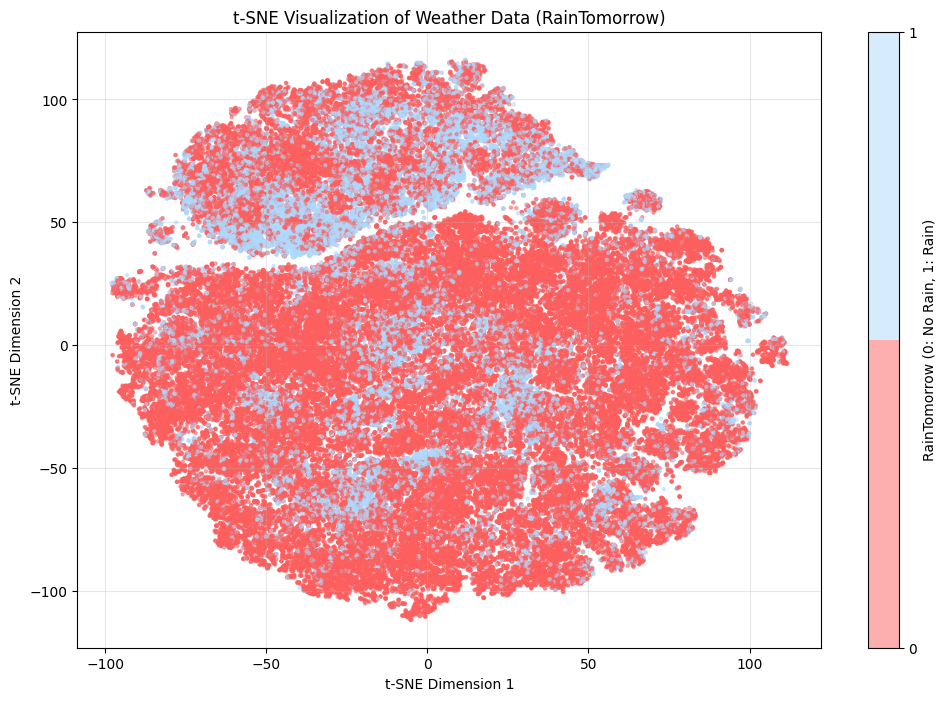

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from matplotlib.colors import ListedColormap

# Load the dataset
file_path = 'weatherAUS.csv'
weather_data = pd.read_csv(file_path)

# Drop irrelevant features
weather_data.drop(["Evaporation", "Sunshine", "Cloud9am", "Cloud3pm"], inplace=True, axis=1)

# Fill numerical features' NaN values with the mean
numerical_features = weather_data.select_dtypes(include=[np.number]).columns
for feature in numerical_features:
    weather_data[feature] = weather_data[feature].fillna(weather_data[feature].mean())

# Fill categorical features' NaN values with the mode
categorical_features = weather_data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    weather_data[feature] = weather_data[feature].fillna(weather_data[feature].mode()[0])

# Print and remove rows where the target variable 'RainTomorrow' is NaN
missing_rain_tomorrow = weather_data['RainTomorrow'].isna().sum()
print(f"Number of missing values in 'RainTomorrow': {missing_rain_tomorrow}")
weather_data.dropna(subset=['RainTomorrow'], inplace=True)

# Encode categorical features
label_encoder = LabelEncoder()
for feature in categorical_features:
    weather_data[feature] = label_encoder.fit_transform(weather_data[feature])

# Separate target variable 'RainTomorrow'
y = weather_data['RainTomorrow']
X = weather_data.drop(columns=['RainTomorrow'])

# Standardize numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, random_state=42)
tsne_result = tsne.fit_transform(scaled_data)

# Create a scatter plot of t-SNE results
plt.figure(figsize=(12, 8))
custom_colors = ListedColormap(['#FD5F5E', '#AFD9FD'])  # 红色和蓝色
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=y, cmap=custom_colors, alpha=0.5, s=5)
plt.colorbar(scatter, ticks=[0, 1], label="RainTomorrow (0: No Rain, 1: Rain)")
plt.title("t-SNE Visualization of Weather Data (RainTomorrow)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(alpha=0.3)
plt.show()
